In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargo los DF procesados en el notebook anterior

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/train_120.csv',encoding='Latin-1')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_120.csv',encoding='Latin-1')

In [ ]:
features=train_data.columns

In [ ]:
features=features.drop('Unnamed: 0')
features=features.drop('isFraud')

In [ ]:
valida = train_data.loc[0:(0.3 * len(train_data.index)), :]

In [ ]:
train = train_data.loc[(0.3 * len(train_data.index)):len(train_data.index), :]

In [ ]:
X=train_data[features]
Y=train_data[['isFraud']]

Hago los split de los DF train y completo los parametros del RF

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
rf = RandomForestClassifier(random_state=10)

In [ ]:
parametros = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 400, 500]
}

In [ ]:
cv = RandomizedSearchCV(rf, param_distributions=parametros, n_iter=10, random_state=13, scoring='roc_auc', n_jobs=1, verbose=100, cv=2)

Busqueda de hiperparametros

In [ ]:
cv.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 1/10] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.862 total time= 3.9min
[CV 2/2; 1/10] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 1/10] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.865 total time= 3.9min
[CV 1/2; 2/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 2/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.842 total time=  39.9s
[CV 2/2; 2/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 2/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.846 total time=  41.2s
[CV 1/2; 3/10] START bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 3/10] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.820 total time=  58.1s
[CV 2/2; 3/10] START bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 3/10] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.819 total time=  56.9s
[CV 1/2; 4/10] START bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 4/10] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.843 total time= 2.2min
[CV 2/2; 4/10] START bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 4/10] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.843 total time= 2.1min
[CV 1/2; 5/10] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 5/10] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.860 total time= 5.9min
[CV 2/2; 5/10] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 5/10] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.865 total time= 5.7min
[CV 1/2; 6/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 6/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.845 total time= 1.4min
[CV 2/2; 6/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 6/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.848 total time= 1.3min
[CV 1/2; 7/10] START bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 7/10] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.839 total time=  31.7s
[CV 2/2; 7/10] START bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 7/10] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.841 total time=  31.9s
[CV 1/2; 8/10] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 8/10] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.863 total time= 5.1min
[CV 2/2; 8/10] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 8/10] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.867 total time= 5.0min
[CV 1/2; 9/10] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 9/10] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.819 total time= 1.1min
[CV 2/2; 9/10] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 9/10] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.819 total time= 1.1min
[CV 1/2; 10/10] START bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/2; 10/10] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.863 total time= 4.0min
[CV 2/2; 10/10] START bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/2; 10/10] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.865 total time= 4.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 500]},
                   random_state=13, scoring='roc_auc', verbose=100)

Busco el mejors estimador y lo uso para entrenar el modelo con los DF

In [ ]:
cv.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400, random_state=10)

In [ ]:
rf = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400, random_state=10)

In [ ]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400, random_state=10)

In [ ]:
print(roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

0.87548299535522


busco los features importance y genero el grafico

In [ ]:
rf.feature_importances_

array([0.00550296, 0.0160132 , 0.04148562, 0.00361283, 0.01875559,
       0.01133065, 0.00101176, 0.00115933, 0.00130797, 0.00167928,
       0.00093786, 0.00107833, 0.00327982, 0.00090141, 0.0010677 ,
       0.00288677, 0.00294045, 0.00739646, 0.01033765, 0.00235924,
       0.00352366, 0.0019872 , 0.00309047, 0.02065995, 0.03558042,
       0.00103168, 0.0035274 , 0.00617535, 0.00228993, 0.00348838,
       0.00232036, 0.00276896, 0.0023043 , 0.00309574, 0.00297572,
       0.00224704, 0.00328746, 0.00358048, 0.00626934, 0.01014147,
       0.00296746, 0.0020602 , 0.00338542, 0.00161891, 0.00273873,
       0.01413037, 0.02042035, 0.00376607, 0.00152189, 0.00239381,
       0.00492244, 0.00112011, 0.00259963, 0.00123288, 0.00517995,
       0.00561232, 0.00771823, 0.00730586, 0.0074568 , 0.00478274,
       0.00324546, 0.00295654, 0.00777123, 0.01735699, 0.02070068,
       0.01162085, 0.00184043, 0.00499656, 0.00392877, 0.00254093,
       0.003529  , 0.00517701, 0.01600047, 0.03286809, 0.04366

In [ ]:
prueba = pd.DataFrame(rf.feature_importances_,index=x_train.columns)

In [ ]:
prueba.rename(columns={0:'feature importance'},inplace=True)

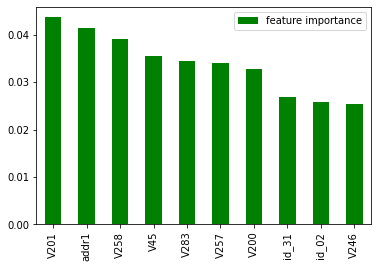

In [ ]:
prueba.sort_values(by=['feature importance'],ascending=False).head(10).plot.bar(y='feature importance',rot=90, color={'g'})

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
confusion_matrix(y_test, rf.predict(x_test))

array([[170838,    216],
       [  4066,   2042]])

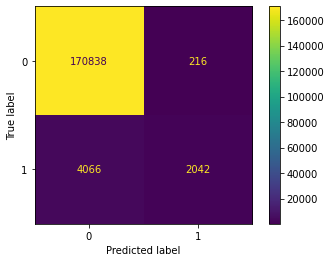

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(x_test))).plot()

In [ ]:
test_data.drop(columns=['Unnamed: 0'],inplace=True)

Predigo el test, lo paso al DF para poder hacer el submit en Kaggle

In [ ]:
rf.predict_proba(test_data)

array([[0.98773655, 0.01226345],
       [0.95687288, 0.04312712],
       [0.95970957, 0.04029043],
       ...,
       [0.95607799, 0.04392201],
       [0.95586611, 0.04413389],
       [0.99434132, 0.00565868]])

In [ ]:
list(rf.predict_proba(test_data))

[array([0.98773655, 0.01226345]),
 array([0.95687288, 0.04312712]),
 array([0.95970957, 0.04029043]),
 array([0.99470631, 0.00529369]),
 array([0.99305167, 0.00694833]),
 array([0.99216706, 0.00783294]),
 array([0.98067264, 0.01932736]),
 array([0.97960495, 0.02039505]),
 array([0.99681822, 0.00318178]),
 array([0.95282254, 0.04717746]),
 array([0.99495188, 0.00504812]),
 array([0.99268558, 0.00731442]),
 array([0.91008838, 0.08991162]),
 array([0.98462304, 0.01537696]),
 array([0.84796676, 0.15203324]),
 array([0.99327834, 0.00672166]),
 array([0.99217559, 0.00782441]),
 array([0.94150662, 0.05849338]),
 array([0.95759841, 0.04240159]),
 array([0.95725288, 0.04274712]),
 array([0.95443926, 0.04556074]),
 array([0.99506487, 0.00493513]),
 array([0.9599583, 0.0400417]),
 array([0.95561721, 0.04438279]),
 array([0.96061348, 0.03938652]),
 array([0.95687288, 0.04312712]),
 array([0.99506487, 0.00493513]),
 array([0.97453338, 0.02546662]),
 array([0.95561721, 0.04438279]),
 array([0.970977

In [ ]:
test_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_120_ids.csv',encoding='Latin-1')

In [ ]:
predict = rf.predict_proba(test_data)

In [ ]:
predict2 = pd.DataFrame(predict)

In [ ]:
predict2[0]=test_id['TransactionID']

In [ ]:
predict2.rename(columns={0:'TransactionID',1:'isFraud'},inplace=True)

In [ ]:
predict2.to_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/to_kaggle_RF.csv',index=False)

Score en Kaggle: 
Private score: 0.825695
Public score: 0.851023